In [5]:
import pandas as pd
import os
import ast
import matplotlib.pyplot as plt

In [6]:
model2output_fp = {
    "BERT4Rec": "results/bert_baseline/test_results/test_output.csv",
    "SR-GNN": "results/srgnn_baseline/test_results/test_output.csv",
    "BERT4Rec + T-LAB": "results/bert_tlab_2/test_results/test_output.csv",
    "Hybrid": "results/hybrid/test_results/test_output.csv"
}

df_dict = dict()
for model in model2output_fp:
    df = pd.read_csv(model2output_fp[model])
    df['top_20'] = df['top_20'].apply(ast.literal_eval)
    df['time_avg'] = df['time_avg'].round()
    df['time_var'] = df['time_var'].round()

    df_dict[model] = df

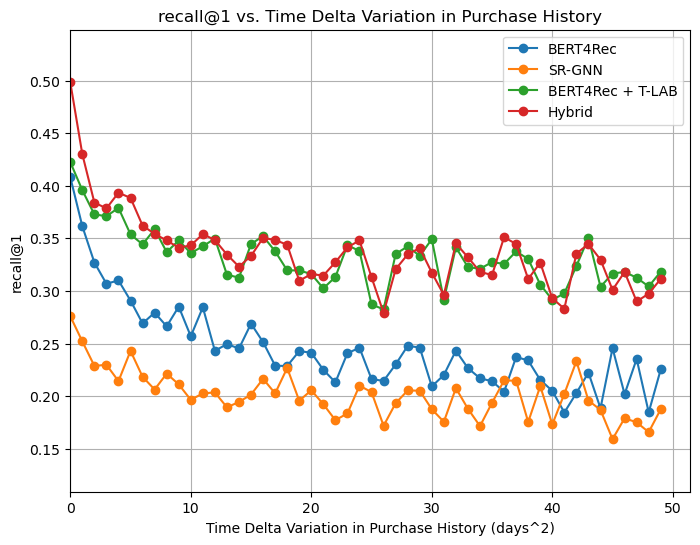

<Figure size 640x480 with 0 Axes>

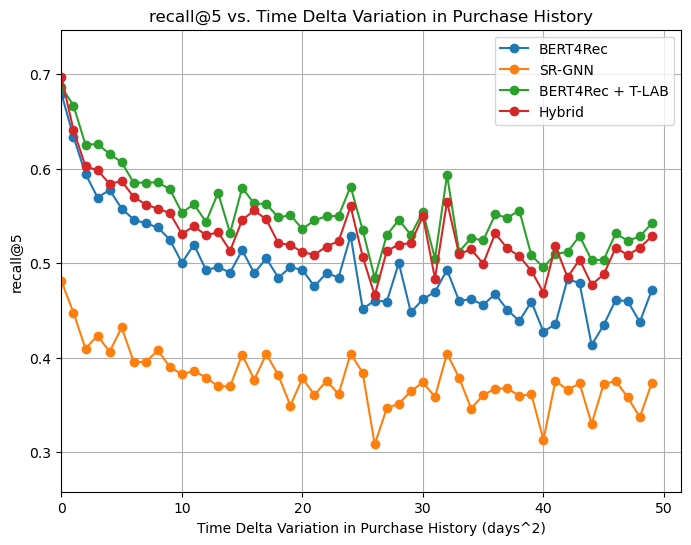

<Figure size 640x480 with 0 Axes>

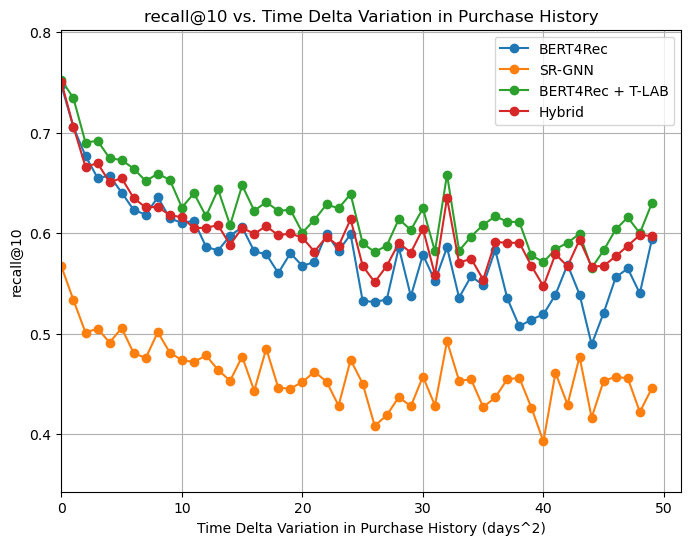

<Figure size 640x480 with 0 Axes>

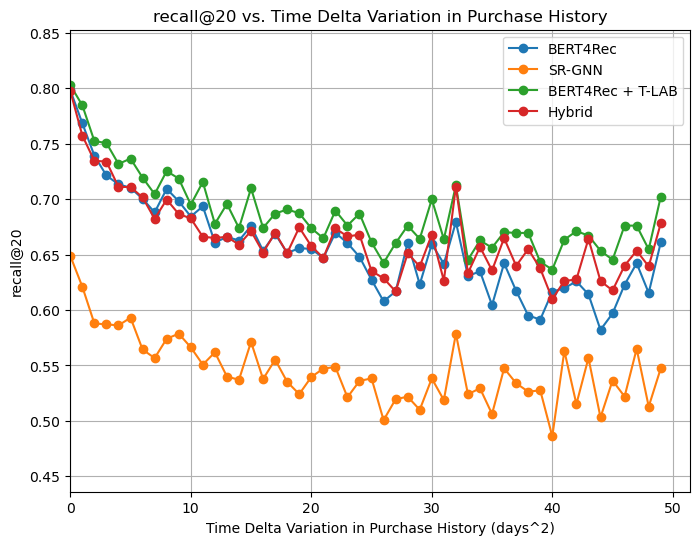

<Figure size 640x480 with 0 Axes>

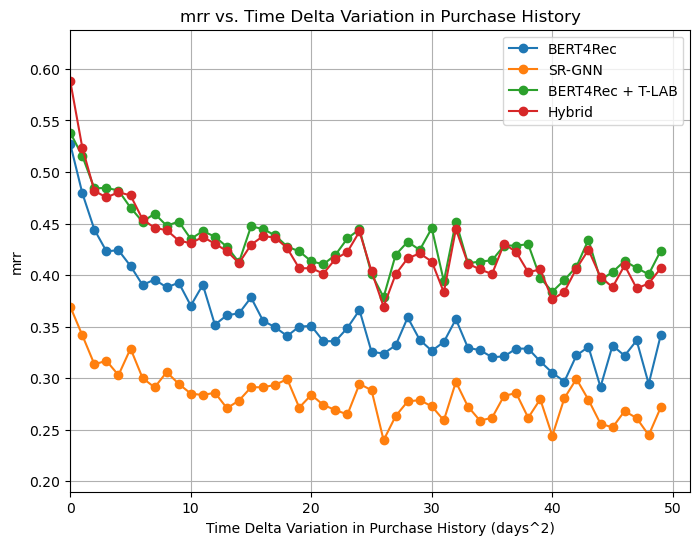

<Figure size 640x480 with 0 Axes>

In [10]:
x_lim = 50

for metric in ["recall@1", "recall@5", "recall@10", "recall@20", "mrr"]:
    plt.figure(figsize=(8, 6))

    min_val = float('inf')
    max_val = -float('inf')

    for model in df_dict:
        grouped_averages = df_dict[model].groupby('time_var')[metric].mean()
        plt.plot(grouped_averages.index[:x_lim], grouped_averages.values[:x_lim], marker='o', linestyle='-', label=model)

        min_val = min(min_val, min(grouped_averages.values[:x_lim]))
        max_val = max(max_val, max(grouped_averages.values[:x_lim]))
    
    plt.xlabel('Time Delta Variation in Purchase History (days^2)')
    plt.ylabel(metric)
    plt.title(f'{metric} vs. Time Delta Variation in Purchase History')
    plt.grid()
    plt.legend()

    plt.xlim([0,None])
    plt.ylim([min_val-0.05, max_val+0.05])

    plt.show()
    plt.clf()

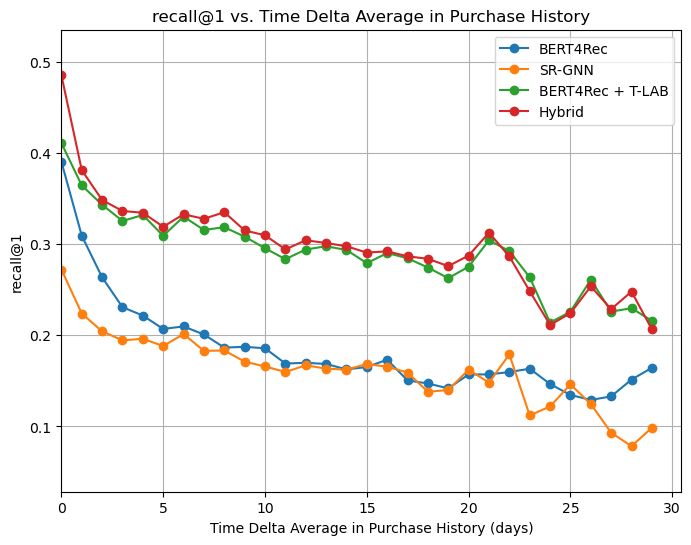

<Figure size 640x480 with 0 Axes>

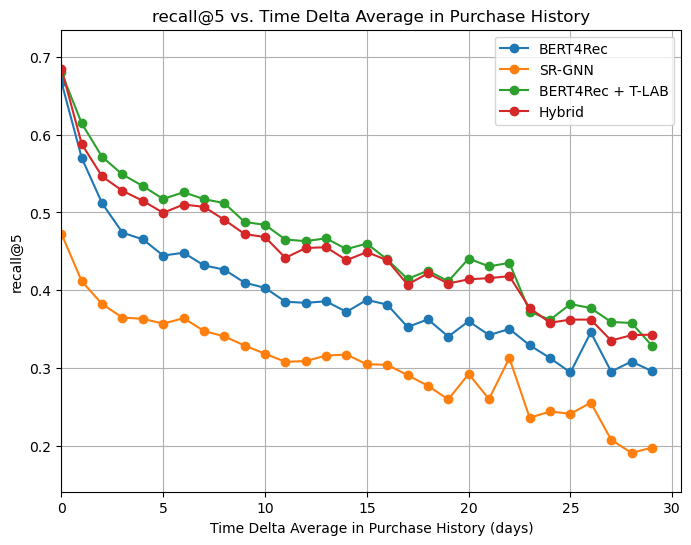

<Figure size 640x480 with 0 Axes>

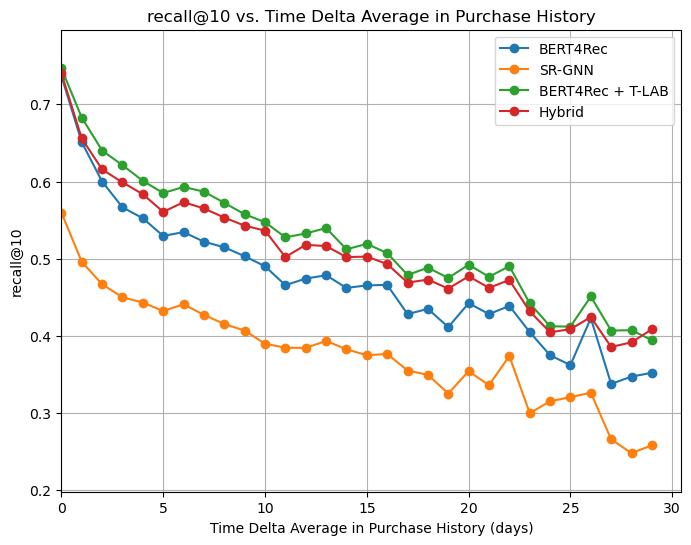

<Figure size 640x480 with 0 Axes>

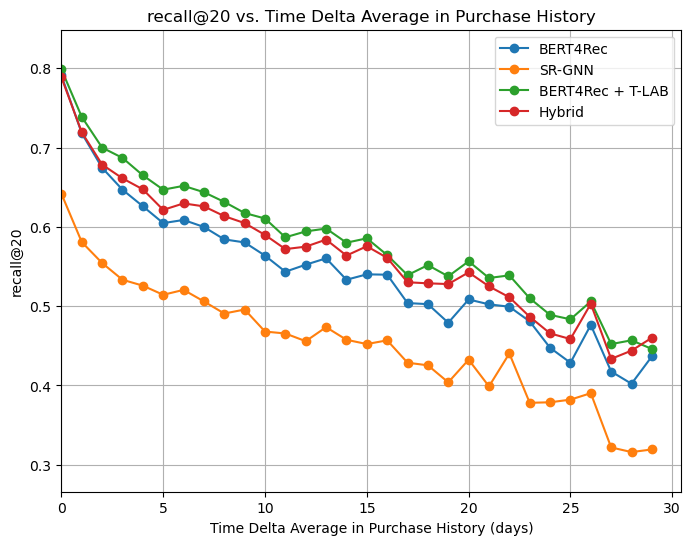

<Figure size 640x480 with 0 Axes>

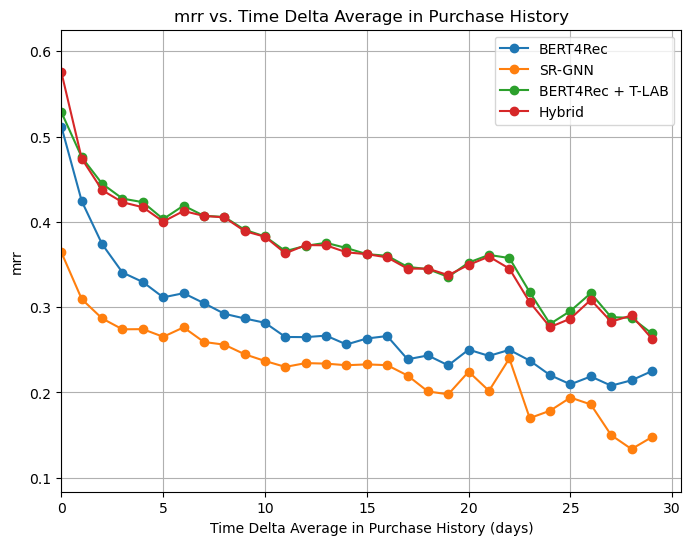

<Figure size 640x480 with 0 Axes>

In [8]:
x_lim = 30

for metric in ["recall@1", "recall@5", "recall@10", "recall@20", "mrr"]:
    plt.figure(figsize=(8, 6))

    min_val = float('inf')
    max_val = -float('inf')

    for model in df_dict:
        grouped_averages = df_dict[model].groupby('time_avg')[metric].mean()
        plt.plot(grouped_averages.index[:x_lim], grouped_averages.values[:x_lim], marker='o', linestyle='-', label=model)

        min_val = min(min_val, min(grouped_averages.values[:x_lim]))
        max_val = max(max_val, max(grouped_averages.values[:x_lim]))
    
    plt.xlabel('Time Delta Average in Purchase History (days)')
    plt.ylabel(metric)
    plt.title(f'{metric} vs. Time Delta Average in Purchase History')
    plt.grid()
    plt.legend()

    plt.xlim([0,None])
    plt.ylim([min_val-0.05, max_val+0.05])

    plt.show()
    plt.clf()

Text(0, 0.5, 'Time Delta Variation (days^2)')

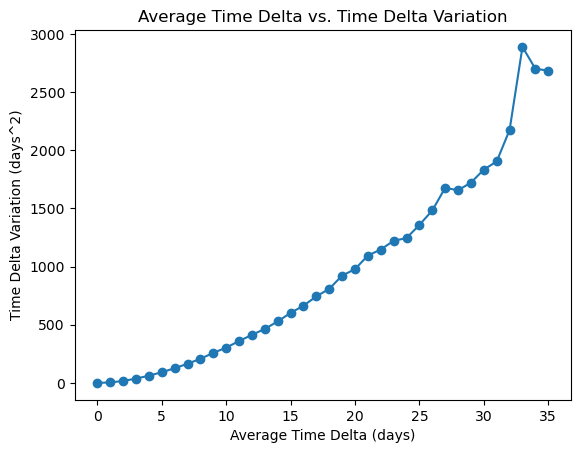

In [23]:
df = pd.read_csv("results/bert_baseline/test_results/test_output.csv")
df["time_var"] = df["time_var"].round()
df["time_avg"] = df["time_avg"].round()

grouped_averages = df.groupby('time_avg')["time_var"].mean()
plt.plot(grouped_averages.index, grouped_averages.values, marker='o', linestyle='-')

plt.title("Average Time Delta vs. Time Delta Variation")
plt.xlabel("Average Time Delta (days)")
plt.ylabel("Time Delta Variation (days^2)")